Laura Villa Fernández-Arroyo  
Sergio Martínez Cid  
David González Bermúdez

# Deliverable 1: Unsupervised Learning

In this work we are going to analyze the dataset *winequality-white.csv* where different features of the wines can be observed.   

## 1. Load/Download the source Data 

The data will be loaded from the directory of your choice using a "Elegir archivos" button.

In [ ]:
from google.colab import files 

uploaded = files.upload() 
for fn in uploaded.keys(): 
  print('User uploaded file "{name}" with length {length} bytes'.format( 
      name=fn, length=len(uploaded[fn]))) 

Saving winequality-white.csv to winequality-white (2).csv
User uploaded file "winequality-white.csv" with length 264426 bytes


## 2. Transform data into a DataFrame 

The data will be read from a *csv* file. Using the tools that provides us the pandas library, it will be transformed into a *DataFrame* with which the data can be managed in a simple way. This *DataFrame* can be accessed through the variable *df_white_original*.

In [ ]:
import pandas as pd 

df_white_original = pd.read_csv("winequality-white.csv", sep =";") 


## 3. Preprocessing

In the **pre-processing phase**, the raw data is going to be transformed into a format that makes it easier to use.

### 3.1 Feature selection 

The *quality* feature of the *DataFrame* will be removed. The resultant *Dataframe* will be saved in a new variable *df_white* in order to keep the original data intact. The first rows of the table will then be displayed.  
The *quality* feature will be used only at the end for the interpretation of the data.

In [ ]:
df_white = df_white_original.drop(['quality'], axis=1)
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
df_white.shape

(4898, 11)

### 3.2 Normalization / Standarization

Two normalization algorithms have been carried out:
- Standard Scaler
- MinMax Scaler  

Both results have been stored in two different variables in order to check them and choose the best one for this problem.

In [ ]:
# Use MinMaxScaler or StandardScaler 
from sklearn import preprocessing 

stnd_scaler = preprocessing.StandardScaler()
df_stnd = stnd_scaler.fit_transform(df_white)

min_max_scaler = preprocessing.MinMaxScaler() 
df_minmax = min_max_scaler.fit_transform(df_white) 


## 4. Dimensionality Reduction (PCA)


The **Principal Component Analysis** will allow us to reduce the number of features of the data taking into account the variance between them. The goal is to obtain a lineal combination between all the variables.

First, the proportion of explained variance for each principal component (the 11 features) of the standarized data will be calculated.  
Both normalization algorithms will be used for the PCA, in order to select the most suitable standarization for this problem. 

In [ ]:
from sklearn.decomposition import PCA
pca_minmax = PCA ()
pca_stnd = PCA ()

X_pca_minmax = pca_minmax.fit_transform(df_minmax)
X_pca_stnd = pca_stnd.fit_transform(df_stnd)
print(f'Minmax -> {pca_minmax.explained_variance_ratio_}')
print(f'Standard -> {pca_stnd.explained_variance_ratio_}')

Minmax -> [0.38165992 0.17846312 0.12895247 0.08592807 0.06842803 0.04595895
 0.03924179 0.0332141  0.02432526 0.01308555 0.00074274]
Standard -> [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


Now, we'll select the optimal number of components.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

exp_var_cumul_stnd = np.cumsum(pca_stnd.explained_variance_ratio_)
exp_var_cumul_minmax = np.cumsum(pca_minmax.explained_variance_ratio_)

trace1 =  go.Scatter(x=list(range(1, exp_var_cumul_minmax.shape[0] + 1)), y=exp_var_cumul_minmax, name = "MinMax Scaler")
trace2 = go.Scatter(x=list(range(1, exp_var_cumul_stnd.shape[0] + 1)), y=exp_var_cumul_stnd, name = "Standard Scaler")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=False)
fig['layout'].update(height = 600, width = 800, title = "MinMax Scaler vs. Standard Scaler", xaxis=dict(
      tickangle=0
    ))
fig.update_layout(xaxis_title="# Components",
    yaxis_title="Explained Variance")
fig.show()

As we can see, only with 5 components the percentage of variance in *MinMax* is almost 85%, meanwhile in *Standard* it doesn't reach the 75%.  
For this reason, the *MinMax* scaler will be selected.

In [ ]:
pca = pca_minmax
X_pca = X_pca_minmax
exp_var_cumul = exp_var_cumul_minmax

Looking at the *MinMax* graph, the suitable number of components could be from 5-6 onwards (at least 85%).
But for a correct visualization of the data, 3 components will be selected.

### 4.1 Visualization

As we've said, the number of components for the correct visualization could be 2-3. In this case, 3 has been selected.

In [ ]:
#@title Number of components {run: "auto"}
n_components_viz = 3 #@param { type: "slider", min: 1, max: 11, step: 1}

In [ ]:
estimator = PCA(n_components = n_components_viz)
X_pca_viz = estimator.fit_transform(df_minmax)
X_pca_viz

array([[-0.36722779, -0.13252996,  0.02257386],
       [-0.10265823,  0.10183294, -0.09231413],
       [-0.04114477, -0.01972909, -0.06241957],
       ...,
       [-0.13643229, -0.13437713,  0.00438464],
       [ 0.43049357,  0.02315615, -0.15624382],
       [ 0.27569088, -0.07111793, -0.18396704]])

In [ ]:
import numpy
pd.DataFrame(numpy.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2', 'PC-3'], index=df_white.columns)


,PC-1,PC-2,PC-3
fixed acidity,-0.074462,-0.231288,0.235757
volatile acidity,0.022258,-0.043414,-0.014591
citric acid,-0.046049,-0.062494,0.152693
residual sugar,-0.201742,-0.045994,0.023045
chlorides,-0.114127,-0.000940,0.001588
free sulfur dioxide,-0.093712,0.054183,0.020420
total sulfur dioxide,-0.257382,0.132921,0.078420
density,-0.224840,0.025827,0.012002
pH,0.138936,0.773832,-0.492790
sulphates,-0.020928,0.557302,0.803830


Now, with the following graph we can visualize the data after PCA application.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X_pca_viz, x=0, y=1, z=2,
    
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()


### 4.2 Final reduction with PCA (components = 5)

For the 'real' dimensionality reduction, in order to have at least a 85% of the original variance, the number of components selected will be 5, because it is the lowest possible number (so the reduction is considerable) but it still allows us to remain a high percentage of variance.

In [ ]:
import numpy
n_components = 5
estimator = PCA(n_components = n_components)
X_pca = estimator.fit_transform(df_minmax)

pd.DataFrame(numpy.matrix.transpose(estimator.components_), columns=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5'], index=df_white.columns)


,PC-1,PC-2,PC-3,PC-4,PC-5
fixed acidity,-0.074462,-0.231288,0.235757,-0.045016,0.115979
volatile acidity,0.022258,-0.043414,-0.014591,0.856555,-0.417969
citric acid,-0.046049,-0.062494,0.152693,-0.116405,0.283697
residual sugar,-0.201742,-0.045994,0.023045,0.195862,0.222053
chlorides,-0.114127,-0.000940,0.001588,0.040789,-0.087335
free sulfur dioxide,-0.093712,0.054183,0.020420,0.110390,0.390023
total sulfur dioxide,-0.257382,0.132921,0.078420,0.403794,0.620968
density,-0.224840,0.025827,0.012002,0.081633,0.084317
pH,0.138936,0.773832,-0.492790,-0.001060,0.077621
sulphates,-0.020928,0.557302,0.803830,-0.031484,-0.184327


In [ ]:
estimator.explained_variance_ratio_ # see each component influence

array([0.38165992, 0.17846312, 0.12895247, 0.08592807, 0.06842803])

## 5. Outlier Detection (DBScan)

### 5.1 Setting  parameters

In order to use **DBScan**, it is necessary to compute the similarity matrix.

In [ ]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(df_minmax)

Then the distance from each point to their neighbours is computed. For this, a relatively low *minPts* parameter is chosen.

In [ ]:
from sklearn.neighbors import kneighbors_graph

minPts=3
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()

Another parameter necessary for DBScan is *epsilon* $\epsilon$, which is the maximum distance between two samples in the same cluster. In order to make a decision, a graph with the points in the x axis and the distance with the 3rd nearest neighbour in the y axis is used.

In [ ]:
import plotly.express as px

fig = px.line(x=numpy.arange(0, len(seq), 1), y=seq)
fig.show()

The values on the y axis of the previous graph are candidates for the epsilon value. To make a better decision, the scope of the epsilon values is limited to $[0.18, 0.45]$, and a step of 0.01 is used for checking the number of clusters and outliers.

In [ ]:
from sklearn.cluster import DBSCAN

results = []
for eps in numpy.arange(0.18, 0.45, 0.01):
  db = DBSCAN(eps, min_samples=minPts).fit(df_minmax)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
 0.18          24         245
 0.19          17         182
 0.2           12         137
 0.21          10         105
 0.22           7          81
 0.23           5          72
 0.24           3          59
 0.25           3          53
 0.26           3          47
 0.27           3          38
 0.28           3          31
 0.29           3          29
 0.3            3          21
 0.31           2          16
 0.32           2          15
 0.33           2          13
 0.34           1          11
 0.35           1          10
 0.36           1           9
 0.37           1           8
 0.38           1           8
 0.39           1           8
 0.4            1           7
 0.41           1           6
 0.42           1           5
 0.43           1           5
 0.44           1           5


### 5.2 Execution

Once the parameters have been decided, the algorithm is executed and the outlier label is saved in another field.

In [ ]:
db = DBSCAN(eps=0.2, min_samples=minPts).fit(df_minmax)
labels = db.labels_
df_white['dbscan_group'] = labels
df_white[df_white['dbscan_group'] == -1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dbscan_group
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.10,-1
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.00,-1
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.90,-1
208,6.8,0.570,0.29,2.20,0.040,15.0,77.0,0.99380,3.32,0.74,10.20,-1
245,6.1,0.180,0.36,2.00,0.038,20.0,249.5,0.99230,3.37,0.79,11.30,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
4789,5.5,0.620,0.33,1.70,0.037,24.0,118.0,0.98758,3.15,0.39,13.55,-1
4792,4.7,0.785,0.00,3.40,0.036,23.0,134.0,0.98981,3.53,0.92,13.80,-1
4815,6.2,0.760,0.01,3.20,0.041,18.0,120.0,0.99026,3.20,0.94,13.70,-1
4837,6.5,0.280,0.38,7.80,0.031,54.0,216.0,0.99154,3.03,0.42,13.10,-1


For the outlier visualization, we'll tranform the *dbscan_group*, by replacing values greater than 0 (which are clusters, not outliers) by a 0. Thus, *dbscan_group* can only have 2 possible values: 0 (not outlier) or -1 (outlier).

In [ ]:
colors = [0 if color >= 0 else -1 for color in df_white['dbscan_group']]

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X_pca_viz, x=0, y=1, z=2,
    color = colors,
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

### 5.3 Outlier Interpretation

In [ ]:
# Not outliers
df_white[df_white['dbscan_group'] != -1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dbscan_group
count,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000,4761.000000
mean,6.848152,0.274378,0.332775,6.368914,0.045153,35.193447,138.009137,0.994009,3.187742,0.488481,10.505667,0.047259
std,0.808096,0.093825,0.114733,4.956882,0.019020,16.120713,41.283976,0.002890,0.147515,0.111933,1.221373,0.588469
min,3.900000,0.080000,0.000000,0.600000,0.012000,2.000000,19.000000,0.987110,2.740000,0.220000,8.400000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,10.300000,1.005000,1.000000,23.500000,0.240000,112.000000,282.000000,1.002400,3.820000,1.080000,14.200000,11.000000


In [ ]:
# Outliers
df_white[df_white['dbscan_group'] == -1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dbscan_group
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,7.085401,0.412482,0.383431,7.173358,0.067307,39.291971,150.576642,0.994676,3.206496,0.537299,10.813139,-1.0
std,1.652429,0.197567,0.253216,8.106143,0.063605,36.093050,72.283269,0.005419,0.242980,0.167742,1.492189,0.0
min,3.800000,0.115000,0.000000,0.800000,0.009000,3.000000,9.000000,0.987220,2.720000,0.250000,8.000000,-1.0
25%,6.100000,0.240000,0.220000,1.800000,0.035000,19.000000,104.000000,0.991800,3.030000,0.420000,9.500000,-1.0
50%,6.800000,0.380000,0.330000,4.500000,0.042000,32.000000,140.000000,0.993960,3.150000,0.500000,10.600000,-1.0
75%,7.900000,0.550000,0.490000,10.200000,0.057000,49.000000,193.000000,0.996500,3.380000,0.640000,12.000000,-1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.790000,1.060000,14.050000,-1.0


As we can see, although there are variables that undergo some little deviations (such as *fixed acidity*, *volatile acidity* and *citric acid*) these are caused by their correlation with the variables that undergo more significant changes.  
The variables which experiment more relevant changes are *residual sugar*, *free sulfur dioxide* and *total sulfur dioxide*. These variables determine if the element is an outlier.

In this problem, we've decided to remove all the outliers because of the influence in **k-means** clustering algorithm.

### 5.4 Outlier Removal

In [ ]:
outlier_indexes = list(df_white[df_white['dbscan_group'] == -1].index)
df_minmax_clean = np.delete(df_minmax, outlier_indexes, axis=0)
np.shape(df_minmax_clean)

(4761, 11)

In [ ]:
# Delete outliers also from original dataframe for later interpretation
df_white_og_clean = df_white_original.drop(labels=outlier_indexes, axis=0 )
df_white_og_clean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


As we can see, the number of rows is correct (original number of elements 4898 - number of outliers 137 = 4761).  
Now, **PCA must be calculated again**, but this time without taking into account the outliers.

In [ ]:
from sklearn.decomposition import PCA

pca_minmax = PCA (n_components=5)
X_pca = pca_minmax.fit_transform(df_minmax_clean)

X_pca_viz = PCA(n_components = 3).fit_transform(df_minmax_clean)

pca_minmax.explained_variance_ratio_

array([0.39781043, 0.17998012, 0.13030403, 0.0809443 , 0.06522712])

## 6. Clustering

Due to the number of elements in this dataset (and despite having removed the outliers), *K-means* clustering algorithm will be selected for this problem.  
However, *HAC* algorithm will also be tested to ensure our choice was the best one.

### 6.1 K-means

Firstly, a heatmap with the correlation of the features is plotted.

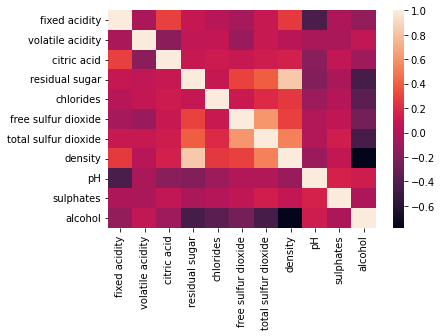

In [ ]:
import seaborn as sns

mtx_corr = df_white.drop('dbscan_group', axis=1).corr()
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

It can be seen that *alcohol* is inversely correlated to most of the variables in the *DataFrame*). This can be explained taking into account the chemical properties of the *alcohol*. For example: 
- *Alcohol* has a medium inverse correlation with *residual wine* because the ***residual sugar* could not be fermented into *alcohol***.
- *Alcohol* has a *density* much lower than wine, so the **higher the wine concentration, the lower the density**. The opposite is true for residual sugars and the density.    

On the other hand, *density* is directly correlated to *residual sugar*, *chlorides*, *free sulfur dioxide* and *total sulfur dioxide*.
The features not mentioned above have the weakest correlations (*volatile acidity*, *citric acid*, *pH* and *sulphates*).



#### 6.1.1 Parametrization

The initialization method selected is the *random* one.  
The distorsions-silhouettes graph will be constructed to see the values that clustering takes in terms of both in order to determine the final number of clusters K.  

In [ ]:
init = 'random' 

iterations = 20
max_iter = 300 

# tolerance to changes in the within-cluster SSE to declare convergence
tol = 1e-04 

# random seed
random_state = 0

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

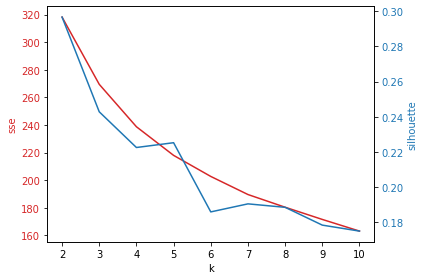

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color) 
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.show()

Looking at the graph, the selected **K will be 5 clusters**, because is the number which maximizes the Silouehette and minimizes the Distortion.

In [ ]:
k = 5
print ("Number of clusters", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

Number of clusters 5


In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.225
Distortion: 218.04


#### 6.1.2 Execution

It's time to visualize the different clusters in a scatterplot.

In [ ]:
# Add a new column to original (without outliers) dataframe to identify the 
# cluster of each element
df_white_og_clean['cluster_id_kmeans'] = km.labels_

print(len(km.labels_))
print(km.labels_)

4761
[1 4 3 ... 1 0 0]


In [ ]:
import plotly.express as px

colors = km.labels_

fig = px.scatter_3d(
    X_pca_viz, x=0, y=1, z=2,
    color = colors,
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()

### 6.2 Hierarchical Aglomerative Clustering

The *euclidean* metric will be used. However, we have looked for other types of distances such as the *mahalanobis* distance that instead of using circumferences uses eclipses but we do not consider that it helps us to improve the solution of the problem.  

The **complete method** is used and not the single or ward method because it tends to break big clusters as there are no good differentiations between them.

In [ ]:
# Compute the similarity matrix
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(df_minmax_clean)

# Building the Dendrogram	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



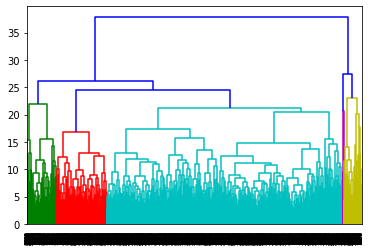

In [ ]:
cluster.hierarchy.dendrogram(clusters, color_threshold=23)
plt.show()

In [ ]:
cut = 23 
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

# Add a new column to original (without outliers) dataframe to identify the 
# cluster of each element
df_white_og_clean['cluster_id_hac'] = list(labels)

print ('Number of clusters %d' % (len(set(labels))))
print(list(labels))

Number of clusters 5
[1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 1, 3, 3, 5, 3, 3, 5, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 1, 2, 5, 5, 2, 1, 3, 1, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 5, 3, 3, 3, 1, 3, 1, 1, 3, 3, 5, 3, 3, 1, 3, 3, 5, 5, 5, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 5, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 

In [ ]:
import plotly.express as px

colors = list(labels)

fig = px.scatter_3d(
    X_pca_viz, x=0, y=1, z=2,
    color = colors,
)
fig.update_traces(marker=dict(size=2),
              selector=dict(mode='markers'))
fig.show()


## 7. Analysis/Interpretation of the results

### 7.1 K-means Interpretation

#### 7.1.1 Description tables

First, a general description of each cluster variable values will be generated, using *describe* function.

In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_kmeans'] == 0].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0,839.000000
mean,6.588081,0.312849,0.322968,3.914482,0.034097,29.691895,112.216925,0.990620,3.211704,0.457354,12.439213,6.560191,0.0,2.630513
std,0.762310,0.090644,0.099037,3.034738,0.008269,11.712375,28.798546,0.001408,0.125963,0.104731,0.507092,0.812132,0.0,1.171183
min,3.900000,0.120000,0.000000,0.700000,0.012000,3.000000,19.000000,0.987110,2.820000,0.220000,11.000000,3.000000,0.0,1.000000
25%,6.000000,0.250000,0.280000,1.700000,0.029000,22.000000,93.000000,0.989600,3.130000,0.380000,12.100000,6.000000,0.0,2.000000
50%,6.600000,0.300000,0.310000,2.900000,0.034000,29.000000,111.000000,0.990450,3.220000,0.440000,12.400000,7.000000,0.0,2.000000
75%,7.100000,0.360000,0.360000,5.000000,0.038000,37.500000,129.000000,0.991400,3.300000,0.520000,12.775000,7.000000,0.0,3.000000
max,9.400000,0.660000,1.000000,20.300000,0.080000,75.000000,213.000000,0.997700,3.590000,0.900000,14.200000,9.000000,0.0,5.000000


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_kmeans'] == 1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.0,1620.000000
mean,6.971790,0.292012,0.353031,10.130000,0.054558,42.981790,167.941049,0.996725,3.125130,0.482352,9.309506,5.512963,1.0,2.641358
std,0.706729,0.095703,0.138106,4.928276,0.024710,16.687722,35.982771,0.001988,0.103487,0.080911,0.402137,0.718900,0.0,0.853952
min,4.900000,0.105000,0.000000,0.800000,0.024000,5.000000,72.000000,0.992000,2.830000,0.290000,8.400000,3.000000,1.0,1.000000
25%,6.500000,0.230000,0.260000,7.000000,0.044000,31.000000,142.000000,0.995400,3.060000,0.430000,9.000000,5.000000,1.0,3.000000
50%,6.900000,0.280000,0.320000,10.500000,0.049000,44.000000,168.000000,0.996800,3.130000,0.480000,9.300000,5.000000,1.0,3.000000
75%,7.400000,0.330000,0.440000,13.900000,0.056000,54.000000,193.000000,0.998200,3.190000,0.530000,9.500000,6.000000,1.0,3.000000
max,10.300000,1.005000,1.000000,23.500000,0.240000,112.000000,282.000000,1.002400,3.440000,0.880000,10.700000,8.000000,1.0,5.000000


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_kmeans'] == 2].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.0,462.000000
mean,6.874567,0.231429,0.354113,4.210714,0.041994,35.519481,132.234848,0.993305,3.215433,0.696861,10.746140,6.090909,2.0,2.976190
std,0.741479,0.067236,0.085897,3.879357,0.009998,18.234126,34.245913,0.002298,0.129220,0.094313,0.833659,0.876522,0.0,0.859726
min,4.800000,0.080000,0.120000,0.800000,0.014000,3.000000,29.000000,0.989100,2.900000,0.540000,8.900000,4.000000,2.0,1.000000
25%,6.400000,0.180000,0.300000,1.400000,0.036000,23.000000,109.000000,0.991590,3.122500,0.630000,10.200000,6.000000,2.0,3.000000
50%,6.800000,0.230000,0.340000,2.200000,0.041000,34.000000,133.000000,0.993000,3.220000,0.680000,10.700000,6.000000,2.0,3.000000
75%,7.300000,0.280000,0.400000,5.800000,0.047000,47.000000,155.000000,0.994538,3.300000,0.750000,11.300000,7.000000,2.0,3.000000
max,9.800000,0.450000,0.740000,16.700000,0.104000,110.000000,218.500000,1.000400,3.630000,1.080000,13.133333,8.000000,2.0,5.000000


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_kmeans'] == 3].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.0,992.000000
mean,7.275504,0.252510,0.335716,4.745514,0.041247,29.258569,116.697581,0.992878,3.096643,0.427470,10.864852,5.867944,3.0,2.825605
std,0.839811,0.081527,0.097973,3.840296,0.015709,14.240454,33.029010,0.001660,0.097896,0.075285,0.577430,0.856919,0.0,0.532335
min,5.000000,0.090000,0.000000,0.600000,0.015000,2.000000,21.000000,0.989260,2.740000,0.230000,9.200000,3.000000,3.0,1.000000
25%,6.700000,0.200000,0.280000,1.500000,0.034000,19.000000,95.000000,0.991677,3.030000,0.370000,10.500000,5.000000,3.0,3.000000
50%,7.200000,0.240000,0.320000,3.200000,0.040000,28.000000,116.500000,0.992790,3.110000,0.420000,10.900000,6.000000,3.0,3.000000
75%,7.800000,0.290000,0.380000,7.400000,0.046000,38.000000,138.250000,0.994000,3.170000,0.480000,11.300000,6.000000,3.0,3.000000
max,10.300000,0.630000,0.790000,20.800000,0.208000,95.000000,209.000000,0.998000,3.280000,0.600000,12.300000,9.000000,3.0,5.000000


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_kmeans'] == 4].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.0,848.000000
mean,6.354953,0.251610,0.288715,4.687087,0.044414,32.522995,134.422759,0.993878,3.375130,0.488833,10.326568,5.869104,4.0,3.042453
std,0.679519,0.097225,0.097403,3.951950,0.011875,13.407706,37.850046,0.002011,0.111632,0.080599,0.629968,0.819242,0.0,0.383348
min,4.700000,0.080000,0.000000,0.700000,0.020000,5.000000,30.000000,0.989460,3.180000,0.280000,8.500000,3.000000,4.0,1.000000
25%,5.900000,0.185000,0.240000,1.400000,0.037000,23.000000,108.000000,0.992320,3.300000,0.430000,9.900000,5.000000,4.0,3.000000
50%,6.300000,0.240000,0.290000,2.700000,0.044000,31.000000,131.000000,0.993615,3.360000,0.490000,10.300000,6.000000,4.0,3.000000
75%,6.800000,0.296250,0.330000,7.200000,0.050000,41.000000,159.250000,0.995160,3.440000,0.540000,10.800000,6.000000,4.0,3.000000
max,8.300000,0.760000,0.740000,19.400000,0.172000,97.000000,244.000000,1.000400,3.820000,0.760000,12.300000,8.000000,4.0,5.000000


#### 7.1.2 Clusters comparison plots

Also, in order to get a better comparison between the clusters, a barplot per variable will be plotted. These plots will allow us to compare each variable between the different clusters.

In [ ]:
import plotly.graph_objects as go
import math

fig = make_subplots(rows=6, cols=2, subplot_titles=list(df_white_og_clean.columns[:12]))
for i, feature in enumerate(list(df_white_og_clean.columns[:12])):
  data = df_white_og_clean.groupby('cluster_id_kmeans').aggregate(np.mean)[feature]
  fig.add_trace(go.Bar(x=data.index, y=data.values, name=feature), row=(math.floor(i/2) + 1), col=(i%2 + 1))
  fig.update_xaxes(title_text="cluster id", row=(math.floor(i/2) + 1), col=(i%2 + 1))
fig.update_layout(height=2000, width=1000, title_text="Variable comparison per cluster", showlegend=False)
fig.show()

#### 7.1.3 Final comments

In a general way, we can say that **cluster 0 and 1** are the most different ones according to *quality* feature (the best and the worst one, respectively). This can be seen in *alcohol* and *residual sugar* variables. In cluster 0, the mean alcohol value is the highest of all the clusters, meanwhile the mean residual sugar is the lowest one. The opposite can be said of the cluster 1 (lowest alcohol, highest residual sugar). This relationship can be explained by **fermentation**: natural fruit sugar transforms into alcohol and CO2. The longer the fermentation process lasts, the higher the quality of the wine.   
Other important features in cluster 0 and 1 are sulfur dioxide and chlorides. Cluster 0 has the lowest mean chloride value, while cluster 1 has the highest one. The same happens with sulfur dioxide: in cluster 0 has a very low value, while in cluster 1 has the highest one.

  
The others are more similar between them in *quality* terms and there is more overlap, so they will be described in **regards to other variables**.  
The more different cluster inside this group is the cluster 2. The *sulphates* variable is the one that sets apart this cluster from clusters 3 and 4. This variable also influences in *volatile acidity* variable, due to *sulphates* are preservatives, and *volatile acidity* is related with a good conservation.  
In general, clusters 3 and 4 are very similar but we can see that cluster 4 has less acid wines because it has the highest *pH*, the lowest *fixed acidity* and *citric acidity*. 

### 7.2 HAC Interpretation

In this interpretation, we'll proceed in the same way to analyze the different variables of each cluster. Finally, a **comparison between k-means clustering results and HAC results** will be done.

#### 7.2.1 Description tables

In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_hac'] == 1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.0
mean,7.371090,0.296955,0.405284,11.320142,0.054964,43.497630,164.503555,0.997015,3.045592,0.496137,9.489968,5.618483,1.284360,1.0
std,0.827134,0.118752,0.170173,5.496962,0.031200,18.739653,47.352603,0.002872,0.135129,0.135669,1.018295,0.851959,0.776552,0.0
min,5.600000,0.110000,0.000000,0.700000,0.017000,3.000000,21.000000,0.989140,2.740000,0.230000,8.500000,3.000000,0.000000,1.0
25%,6.800000,0.210000,0.280000,8.100000,0.040000,29.000000,142.250000,0.995710,2.940000,0.390000,8.800000,5.000000,1.000000,1.0
50%,7.300000,0.275000,0.390000,12.500000,0.048000,46.000000,166.000000,0.997840,3.020000,0.470000,9.100000,6.000000,1.000000,1.0
75%,7.800000,0.360000,0.500000,15.000000,0.056000,56.000000,193.750000,0.999035,3.120000,0.580000,9.500000,6.000000,1.000000,1.0
max,10.300000,0.705000,1.000000,23.500000,0.185000,101.000000,282.000000,1.002400,3.440000,0.880000,13.000000,8.000000,4.000000,1.0


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_hac'] == 2].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,718.00000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.0
mean,6.72688,0.284826,0.331769,3.741992,0.034946,29.676184,112.320334,0.990818,3.187702,0.474373,12.237628,6.487465,0.530641,2.0
std,0.71303,0.083382,0.079244,2.944587,0.008702,11.915495,29.944680,0.001305,0.122763,0.116372,0.410383,0.822782,1.098259,0.0
min,4.80000,0.080000,0.000000,0.700000,0.012000,3.000000,24.000000,0.988230,2.900000,0.260000,11.000000,3.000000,0.000000,2.0
25%,6.20000,0.230000,0.280000,1.600000,0.030000,22.000000,93.000000,0.989900,3.100000,0.380000,12.000000,6.000000,0.000000,2.0
50%,6.70000,0.280000,0.320000,2.600000,0.034000,30.000000,110.500000,0.990600,3.180000,0.445000,12.300000,6.000000,0.000000,2.0
75%,7.10000,0.330000,0.360000,5.000000,0.039000,37.000000,130.000000,0.991600,3.270000,0.550000,12.500000,7.000000,0.000000,2.0
max,9.20000,0.580000,0.740000,15.500000,0.104000,70.000000,213.000000,0.995800,3.590000,0.820000,13.100000,9.000000,4.000000,2.0


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_hac'] == 3].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,3349.000000,3349.000000,3349.00000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.000000,3349.00000,3349.000000,3349.000000,3349.0
mean,6.837996,0.264221,0.32275,6.519827,0.045578,35.559421,141.706778,0.994531,3.201986,0.485342,10.13912,5.757241,2.310540,3.0
std,0.781472,0.084111,0.10344,4.831865,0.012887,15.953156,39.450963,0.002385,0.137120,0.093967,0.81499,0.804267,1.267298,0.0
min,4.700000,0.080000,0.00000,0.600000,0.015000,2.000000,25.000000,0.989240,2.800000,0.260000,8.40000,3.000000,0.000000,3.0
25%,6.300000,0.210000,0.26000,1.700000,0.038000,24.000000,113.000000,0.992690,3.110000,0.420000,9.40000,5.000000,1.000000,3.0
50%,6.800000,0.250000,0.31000,6.100000,0.045000,34.000000,139.000000,0.994400,3.190000,0.480000,10.10000,6.000000,2.000000,3.0
75%,7.300000,0.310000,0.38000,10.000000,0.051000,47.000000,170.000000,0.996200,3.290000,0.540000,10.80000,6.000000,3.000000,3.0
max,10.300000,0.690000,0.74000,20.800000,0.147000,112.000000,272.000000,1.001100,3.680000,0.850000,12.30000,9.000000,4.000000,3.0


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_hac'] == 4].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,7.080952,0.487857,0.386190,7.011905,0.037143,29.571429,155.952381,0.993957,3.203333,0.789524,11.708730,5.952381,0.714286,4.0
std,1.723548,0.232328,0.232196,6.468112,0.010542,14.698882,51.730529,0.004924,0.196960,0.150016,2.107194,1.359272,0.717137,0.0
min,5.200000,0.150000,0.130000,1.200000,0.021000,12.000000,82.000000,0.989100,2.920000,0.460000,8.700000,4.000000,0.000000,4.0
25%,5.600000,0.310000,0.180000,2.100000,0.028000,18.000000,120.000000,0.989490,2.990000,0.750000,9.400000,5.000000,0.000000,4.0
50%,6.100000,0.490000,0.400000,4.500000,0.038000,27.000000,130.000000,0.990790,3.210000,0.780000,13.000000,6.000000,1.000000,4.0
75%,8.700000,0.560000,0.570000,14.350000,0.044000,34.000000,191.000000,0.999900,3.390000,0.880000,13.500000,7.000000,1.000000,4.0
max,10.000000,1.005000,0.740000,17.850000,0.056000,62.000000,243.000000,1.000700,3.480000,1.080000,14.000000,8.000000,2.000000,4.0


In [ ]:
df_white_og_clean[df_white_og_clean['cluster_id_hac'] == 5].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_id_kmeans,cluster_id_hac
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,6.431873,0.324203,0.343028,3.491633,0.052849,32.601594,116.111554,0.991114,3.235498,0.532669,12.049004,6.422311,0.940239,5.0
std,0.850518,0.126436,0.160264,2.492695,0.047637,17.574943,35.701114,0.002350,0.215219,0.195680,1.501369,1.010416,1.338811,0.0
min,3.900000,0.120000,0.000000,0.900000,0.014000,3.000000,19.000000,0.987110,2.820000,0.220000,8.700000,3.000000,0.000000,5.0
25%,5.800000,0.222500,0.260000,1.600000,0.031000,20.000000,93.000000,0.989350,3.080000,0.385000,10.750000,6.000000,0.000000,5.0
50%,6.400000,0.300000,0.310000,2.700000,0.036000,29.000000,111.000000,0.990360,3.220000,0.480000,12.800000,6.000000,0.000000,5.0
75%,6.950000,0.390000,0.390000,4.600000,0.046000,41.000000,134.000000,0.992980,3.320000,0.690000,13.100000,7.000000,2.000000,5.0
max,9.400000,0.815000,1.000000,12.900000,0.240000,96.000000,252.000000,0.999400,3.820000,1.010000,14.200000,8.000000,4.000000,5.0


#### 7.2.2 Clusters comparison plots

In [ ]:
import plotly.graph_objects as go
import math

fig = make_subplots(rows=6, cols=2, subplot_titles=list(df_white_og_clean.columns[:12]))
for i, feature in enumerate(list(df_white_og_clean.columns[:12])):
  data = df_white_og_clean.groupby('cluster_id_hac').aggregate(np.mean)[feature]
  fig.add_trace(go.Bar(x=data.index, y=data.values, name=feature), row=(math.floor(i/2) + 1), col=(i%2 + 1))
  fig.update_xaxes(title_text="cluster id", row=(math.floor(i/2) + 1), col=(i%2 + 1))
fig.update_layout(height=2000, width=1000, title_text="Variable comparison per cluster",showlegend=False)
fig.show()

#### 7.2.3 Final comments

We can distinguish two main groups (see dendogram) between the clusters: **clusters 4 and 5** form one group while **clusters 1 to 3** form another group.  
**Clusters 4 and 5 are concentric rings** that wrap all the other elements. They are so different because they haver more dispersion.  
**Clusters 1 to 3 could fit more or less in different clusters from K-means** algorithm. In particular, cluster 2 is very similar to cluster 0 (good quality wines) from k-means; cluster 1 is similar to cluster 1 from k-means; and cluster 3 is a fusion of clusters 2, 3, 4 and a little part of 1 from k-means (which decreases the cluster *quality* feature as they are the 'bad quality' wines).